Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc. <br>
Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('uber.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.shape

(200000, 9)

In [5]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [6]:
 df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [8]:
df['dropoff_longitude'].fillna(df['dropoff_longitude'].mean(), inplace=True)
df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean(), inplace=True)

In [9]:
 df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
df = df.drop(['Unnamed: 0','key','pickup_datetime'], axis=1)

In [11]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5


<AxesSubplot:>

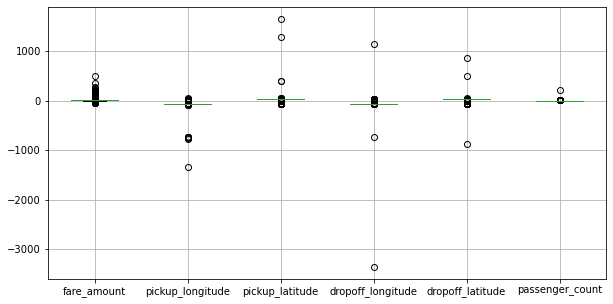

In [12]:
df.boxplot(figsize=(10,5))

In [13]:
def remove_outliers(df, col):
    Q1 = np.quantile(df[col], 0.25)
    Q3 = np.quantile(df[col], 0.75)
    IQR = Q3 - Q1
    upper_bound = Q3+(1.5*IQR)
    lower_bound = Q1-(1.5*IQR)
    df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

def treat_outliers(df, col_list):
    for c in col_list:
        df = remove_outliers(df,c)
    return df

In [14]:
df = treat_outliers(df, df.iloc[:,:8])
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.90,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3.0
4,16.00,-73.929786,40.744085,-73.973082,40.761247,3.5
...,...,...,...,...,...,...
199995,3.00,-73.987042,40.739367,-73.986525,40.740297,1.0
199996,7.50,-73.984722,40.736837,-74.006672,40.739620,1.0
199997,22.25,-73.986017,40.756487,-73.922034,40.692588,2.0
199998,14.50,-73.997124,40.725452,-73.983215,40.695415,1.0


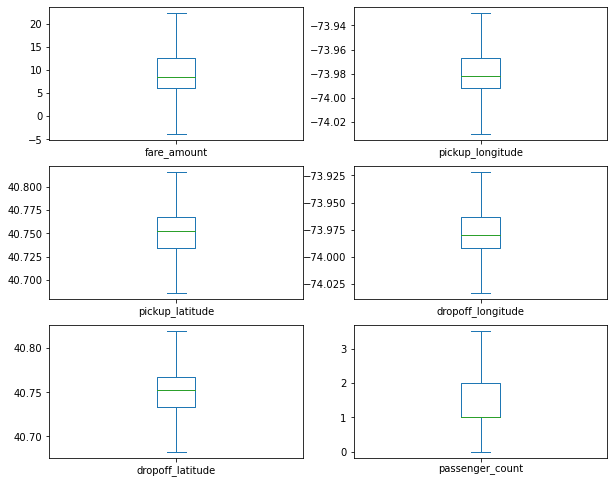

In [15]:
df.plot(kind='box', subplots=True,layout=(7,2),figsize=(10,20))
plt.show()

In [16]:
df.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.154069,-0.110842,0.218704,-0.125898,0.015778
pickup_longitude,0.154069,1.000000,0.259497,0.425631,0.073290,-0.013213
pickup_latitude,-0.110842,0.259497,1.000000,0.048898,0.515714,-0.012889
dropoff_longitude,0.218704,0.425631,0.048898,1.000000,0.245627,-0.009325
dropoff_latitude,-0.125898,0.073290,0.515714,0.245627,1.000000,-0.006308
passenger_count,0.015778,-0.013213,-0.012889,-0.009325,-0.006308,1.000000


<AxesSubplot:>

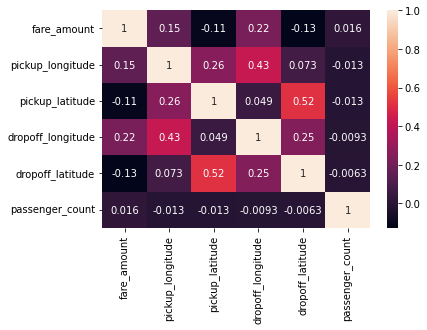

In [17]:
import seaborn as sns 
sns.heatmap(df.corr(), annot=True)

In [18]:
X= df.iloc[:,1:-1]
X

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-73.999817,40.738354,-73.999512,40.723217
1,-73.994355,40.728225,-73.994710,40.750325
2,-74.005043,40.740770,-73.962565,40.772647
3,-73.976124,40.790844,-73.965316,40.803349
4,-73.929786,40.744085,-73.973082,40.761247
...,...,...,...,...
199995,-73.987042,40.739367,-73.986525,40.740297
199996,-73.984722,40.736837,-74.006672,40.739620
199997,-73.986017,40.756487,-73.922034,40.692588
199998,-73.997124,40.725452,-73.983215,40.695415


In [19]:
y = df.iloc[:,:1]

In [20]:
y

,fare_amount
0,7.50
1,7.70
2,12.90
3,5.30
4,16.00
...,...
199995,3.00
199996,7.50
199997,22.25
199998,14.50


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.25, random_state=0)

In [23]:
from sklearn.linear_model  import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred1 = lr.predict(X_test)

In [25]:
y_pred1

array([[ 9.9145945 ],
       [ 9.6922758 ],
       [ 9.64540444],
       ...,
       [ 8.73776113],
       [ 8.17587726],
       [10.64409048]])

In [26]:
from sklearn.metrics import mean_squared_error,r2_score
import math
mse1 = mean_squared_error(y_test, y_pred1)
mse1

27.05890052898207

In [27]:
rmse1 = math.sqrt(mse1)
rmse1

5.201817041090744

In [28]:
r2_score(y_test, y_pred1)

0.08870516229630265

In [44]:
y_train = np.squeeze(y_train)

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train.values.ravel())

RandomForestRegressor()

In [55]:
y_pred2 = rf.predict(X_test)

In [56]:
y_pred2

array([8.772 , 6.969 , 5.5225, ..., 7.358 , 9.756 , 6.136 ])

In [58]:
mse2 = mean_squared_error(y_test, y_pred2)
mse2

7.114651514579149

In [59]:
rmse2 = math.sqrt(mse2)
rmse2

2.667330409712893

In [60]:
r2_score(y_test, y_pred2)

0.7603914028083876